In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
#we are loading the data from 01/01/2015 to 26/09/2021
btc_hist = pd.read_csv('./BTC-USD.csv', index_col='Date')

In [6]:
#There are some missing values

btc_hist[btc_hist.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#We add the missing data manually (these values come from coinmarketcap.com)
#then we create a copy of the data so as not to change the original

btc_hist_m=btc_hist.copy()

btc_hist_m.loc['2020-10-13']=[11548.72, 11548.98, 11321.22,
        11425.90, 11425.90, 24241420251.0]
btc_hist_m.loc['2020-10-12']=[11392.64, 11698.47, 11240.69,
        11555.36, 11555.36, 26163972642.0]
btc_hist_m.loc['2020-10-09']=[10927.91, 11102.67, 10846.85,
        11064.46, 11064.46, 22799117613.0]
btc_hist_m.loc['2020-04-17']=[7116.55, 7167.18, 7050.33,
        7096.18, 7096.18, 32513423567.0]

btc_hist_m[btc_hist_m.isna().any(axis=1)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [8]:
#We change the column Date to a date format
btc_hist_m.index=pd.to_datetime(arg=btc_hist_m.index,format='%Y-%m-%d')

In [9]:
#Erasing unnecesary columns
btc_hist_m = btc_hist_m.drop(labels=['Open','High','Low','Adj Close'], axis=1)

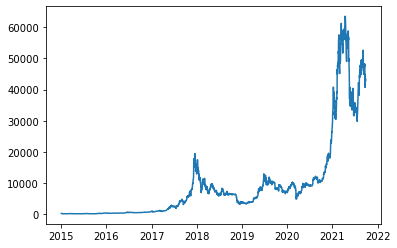

In [10]:
#Let's take a look at the data
plt.plot(btc_hist_m.index, btc_hist_m['Close'])

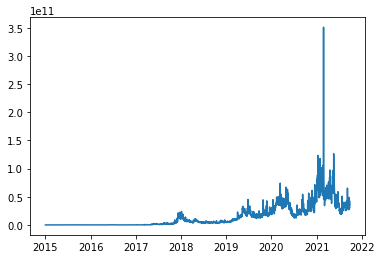

In [11]:
#Let's take a look at the data
plt.plot(btc_hist_m.index, btc_hist_m['Volume'])

In [12]:
btc_hist_m_close = btc_hist_m.drop(labels=['Volume'], axis=1)

In [13]:
final = seasonal_decompose(btc_hist_m_close,model='multiplicative')

<AxesSubplot:xlabel='Date'>

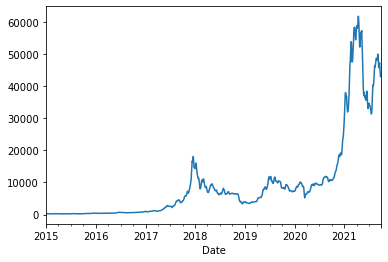

In [14]:
final.trend.plot()

<AxesSubplot:xlabel='Date'>

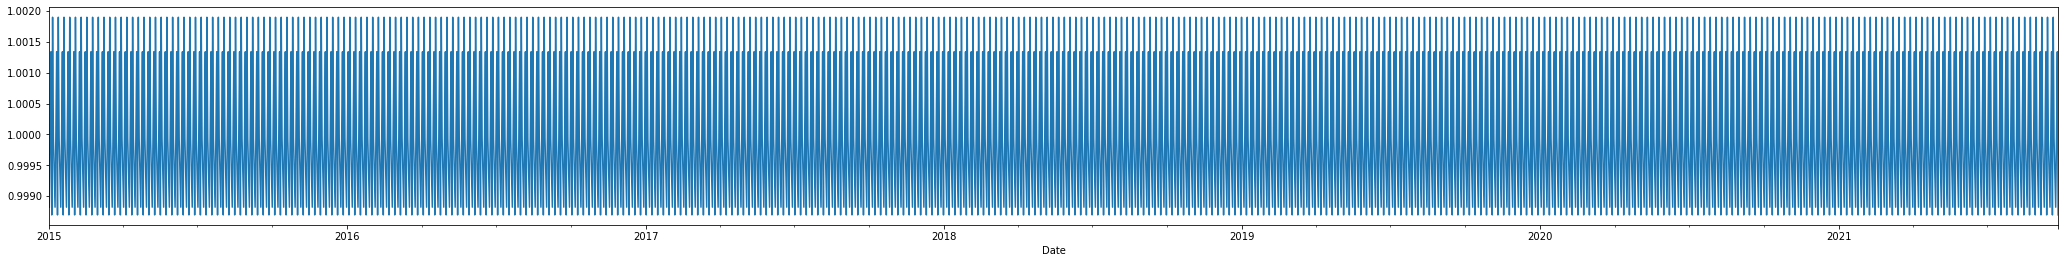

In [15]:
final.seasonal.plot(figsize=(36,4))

<AxesSubplot:xlabel='Date'>

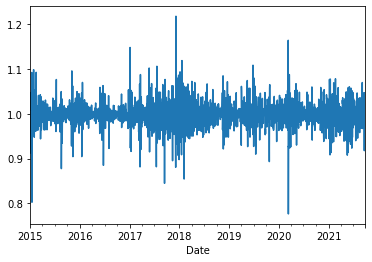

In [16]:
final.resid.plot()

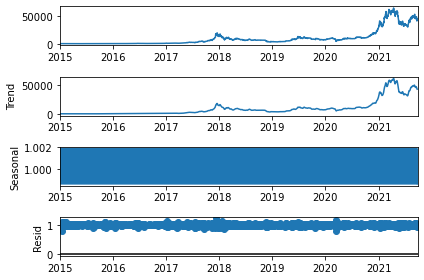

In [17]:
fig = final.plot()

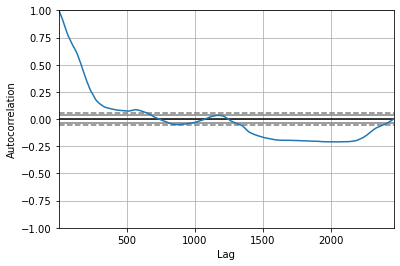

In [18]:
autocorrelation_plot(btc_hist_m_close)
plt.show()

In [19]:
result = adfuller(btc_hist_m_close.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.554717
p-value: 0.880890


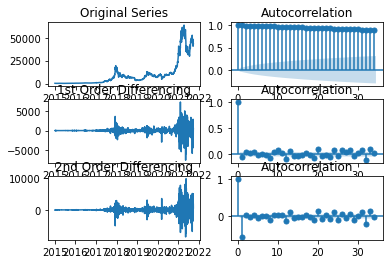

In [20]:

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(btc_hist_m_close); axes[0, 0].set_title('Original Series')
plot_acf(btc_hist_m_close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(btc_hist_m_close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(btc_hist_m_close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(btc_hist_m_close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(btc_hist_m_close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

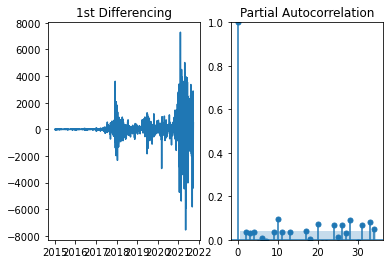

In [21]:
# PACF plot of 1st differenced series

fig, axes = plt.subplots(1, 2)
axes[0].plot(btc_hist_m_close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_pacf(btc_hist_m_close.diff().dropna(), ax=axes[1])

plt.show()

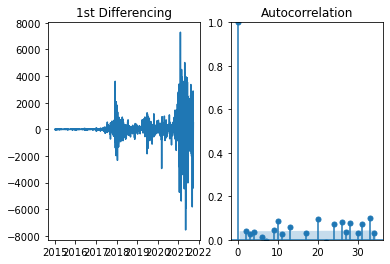

In [22]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(btc_hist_m_close.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1))
plot_acf(btc_hist_m_close.diff().dropna(), ax=axes[1])

plt.show()

/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2461
Model:                ARIMA(9, 1, 10)   Log Likelihood              -19534.095
Date:                Thu, 02 Dec 2021   AIC                          39108.189
Time:                        10:55:19   BIC                          39224.347
Sample:                    01-01-2015   HQIC                         39150.395
                         - 09-26-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0407      0.107     -0.382      0.703      -0.250       0.168
ar.L2         -0.0755      0.084     -0.902      0.367      -0.239       0.089
ar.L3         -0.2907      0.081     -3.574      0.0

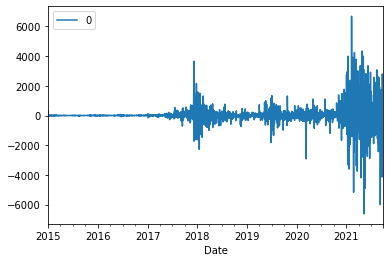

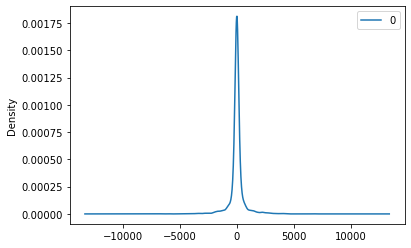

                 0
count  2461.000000
mean     15.668422
std     679.040898
min   -6631.456252
25%     -51.575647
50%       1.876627
75%      82.239635
max    6689.545454


In [23]:
# fit model
model = ARIMA(btc_hist_m_close, order=(9,1,10))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [24]:
# Create Training and Test
train, test = train_test_split(btc_hist_m_close, shuffle=False, test_size=0.2)

In [25]:
test.size

493

/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/state

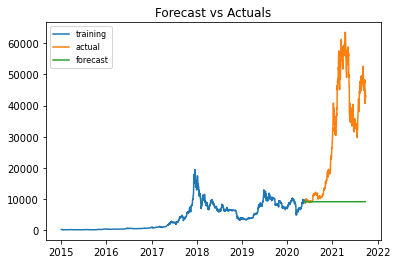

In [26]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(9, 1, 10))  
fitted = model.fit()  

# Forecast
fc = fitted.forecast(490, alpha=0.05)  # 95% conf


# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
#plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [27]:
import warnings
warnings.filterwarnings(action='once')

/home/dsc/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/dsc/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  wa

bucle: 0.000000 predicted=9154.856636, expected=9182.577148
bucle: 1.000000 predicted=9257.527957, expected=9209.287109
bucle: 2.000000 predicted=9263.697495, expected=8790.368164
bucle: 3.000000 predicted=8756.750828, expected=8906.934570
bucle: 4.000000 predicted=8894.555377, expected=8835.052734
bucle: 5.000000 predicted=8915.093782, expected=9181.017578
bucle: 6.000000 predicted=9216.893800, expected=9525.750977
bucle: 7.000000 predicted=9366.411143, expected=9439.124023
bucle: 8.000000 predicted=9410.838965, expected=9700.414063
bucle: 9.000000 predicted=9651.139984, expected=9461.058594
bucle: 10.000000 predicted=9494.748435, expected=10167.268555
bucle: 11.000000 predicted=10298.383206, expected=9529.803711
bucle: 12.000000 predicted=9399.961651, expected=9656.717773
bucle: 13.000000 predicted=9683.028902, expected=9800.636719
bucle: 14.000000 predicted=9810.859840, expected=9665.533203
bucle: 15.000000 predicted=9803.891712, expected=9653.679688
bucle: 16.000000 predicted=9621.

bucle: 132.000000 predicted=10620.245427, expected=10623.330078
bucle: 133.000000 predicted=10672.208942, expected=10585.164063
bucle: 134.000000 predicted=10523.696642, expected=10565.493164
bucle: 135.000000 predicted=10689.052179, expected=10684.428711
bucle: 136.000000 predicted=10722.860256, expected=10804.000977
bucle: 137.000000 predicted=10790.006871, expected=10621.664063
bucle: 138.000000 predicted=10626.620703, expected=10679.136719
bucle: 139.000000 predicted=10655.966782, expected=10923.627930
bucle: 140.000000 predicted=10978.973932, expected=11064.460000
bucle: 141.000000 predicted=10987.903457, expected=11296.361328
bucle: 142.000000 predicted=11282.307678, expected=11384.181641
bucle: 143.000000 predicted=11319.638859, expected=11555.360000
bucle: 144.000000 predicted=11638.939495, expected=11425.900000
bucle: 145.000000 predicted=11467.703190, expected=11429.506836
bucle: 146.000000 predicted=11443.842273, expected=11495.349609
bucle: 147.000000 predicted=11489.117636

bucle: 261.000000 predicted=39693.284374, expected=38903.441406
bucle: 262.000000 predicted=39029.023624, expected=46196.464844
bucle: 263.000000 predicted=46709.890650, expected=46481.105469
bucle: 264.000000 predicted=46225.628967, expected=44918.183594
bucle: 265.000000 predicted=44085.672402, expected=47909.332031
bucle: 266.000000 predicted=48501.880987, expected=47504.851563
bucle: 267.000000 predicted=48474.935953, expected=47105.515625
bucle: 268.000000 predicted=47979.187621, expected=48717.289063
bucle: 269.000000 predicted=48338.985799, expected=47945.058594
bucle: 270.000000 predicted=48183.947887, expected=49199.871094
bucle: 271.000000 predicted=49945.579840, expected=52149.007813
bucle: 272.000000 predicted=52424.118451, expected=51679.796875
bucle: 273.000000 predicted=52459.372349, expected=55888.132813
bucle: 274.000000 predicted=56411.127562, expected=56099.519531
bucle: 275.000000 predicted=54585.648732, expected=57539.945313
bucle: 276.000000 predicted=58988.005262

bucle: 390.000000 predicted=40474.469524, expected=38347.062500
bucle: 391.000000 predicted=38400.497113, expected=38053.503906
bucle: 392.000000 predicted=39131.473874, expected=35787.246094
bucle: 393.000000 predicted=36037.831702, expected=35615.871094
bucle: 394.000000 predicted=36779.019538, expected=35698.296875
bucle: 395.000000 predicted=34566.458932, expected=31676.693359
bucle: 396.000000 predicted=32187.138177, expected=32505.660156
bucle: 397.000000 predicted=30613.498344, expected=33723.027344
bucle: 398.000000 predicted=35073.654793, expected=34662.437500
bucle: 399.000000 predicted=33260.194683, expected=31637.779297
bucle: 400.000000 predicted=33436.980624, expected=32186.277344
bucle: 401.000000 predicted=30891.739300, expected=34649.644531
bucle: 402.000000 predicted=35018.493286, expected=34434.335938
bucle: 403.000000 predicted=33974.762989, expected=35867.777344
bucle: 404.000000 predicted=35243.468702, expected=35040.835938
bucle: 405.000000 predicted=35370.913260

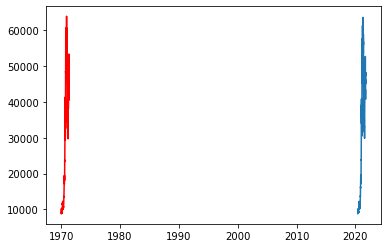

In [28]:
history = train
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(9,1,10), enforce_stationarity=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history=history.append(obs)
    print('bucle: %f predicted=%f, expected=%f' % (t, yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

/home/dsc/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


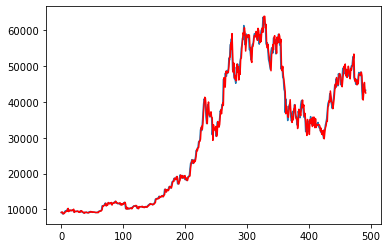

In [29]:
plt.plot(test.reset_index().drop(labels=['Date'],axis=1))
plt.plot(predictions, color='red')
plt.show()